In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'data\51st Bisons vs CNF Rd 1\Plane\Enemies_PlaneId_10B.csv', usecols=['Unix time', 'Roll', 'Pitch', 'Yaw', 'Longitude', 'Latitude','Altitude'])
# 设置 Unix time 为 index，并且保留这一列
data.set_index('Unix time', inplace=True, drop=False)
data.head()

,Unix time,Longitude,Latitude,Altitude,Roll,Pitch,Yaw
Unix time,,,,,,,
119,119,54.657843,24.424132,30.19,-0.0,0.2,217.1
120,120,54.657843,24.424132,30.19,0.2,0.4,217.1
121,121,54.657843,24.424132,30.23,0.0,0.1,217.1
122,122,54.657843,24.424132,30.24,0.0,-0.1,217.1
123,123,54.657842,24.424132,30.26,0.0,-0.2,217.1


In [3]:
# 计算俯仰角变化率
data['Pitch_rate'] = data['Pitch'].diff()
data['Pitch_rate'] = data['Pitch_rate'].fillna(0)

# 计算横滚角变化率
data['Roll_rate'] = data['Roll'].diff()
data['Roll_rate'] = data['Roll_rate'].fillna(0)

# 计算偏航角变化率
data['Yaw_rate'] = data['Yaw'].diff()
data['Yaw_rate'] = data['Yaw_rate'].fillna(0)

data

,Unix time,Longitude,Latitude,Altitude,Roll,Pitch,Yaw,Pitch_rate,Roll_rate,Yaw_rate
Unix time,,,,,,,,,,
119,119,54.657843,24.424132,30.19,-0.0,0.2,217.1,0.0,0.0,0.0
120,120,54.657843,24.424132,30.19,0.2,0.4,217.1,0.2,0.2,0.0
121,121,54.657843,24.424132,30.23,0.0,0.1,217.1,-0.3,-0.2,0.0
122,122,54.657843,24.424132,30.24,0.0,-0.1,217.1,-0.2,0.0,0.0
123,123,54.657842,24.424132,30.26,0.0,-0.2,217.1,-0.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2550,2550,55.460738,25.429733,2451.94,1.5,4.2,219.7,-2.6,-0.3,0.0
2551,2551,55.459117,25.427960,2469.50,1.4,3.7,219.7,-0.5,-0.1,0.0
2552,2552,55.457496,25.426190,2485.28,1.3,3.5,219.7,-0.2,-0.1,0.0


In [4]:
times = []

# 找到 Roll 在 -20 与 -70 之间的时间
for i in range(len(data)):
    if (-80 < data.iloc[i]['Roll'] < -45 or 45 < data.iloc[i]['Roll'] < 80) and abs(data.iloc[i]['Yaw_rate']) > 2.5:
        times.append(data.iloc[i]['Unix time'])


# 遍历times, 转换为times_
times_ = []
temp = []
for i in range(len(times)):
    temp.append(times[i])
    if times[i] + 1 not in times:
        times_.append(temp)
        temp = []

# 求俯仰角累积变化量
pitch_acc = []
for i in range(len(times_)):
    temp = 0
    for j in range(len(times_[i]) - 1):
        temp += abs(data.loc[times_[i][j+1]]['Yaw'] - data.loc[times_[i][j]]['Yaw'])
    pitch_acc.append(temp)

flag = []
for i in range(len(pitch_acc)):
    if pitch_acc[i] > 40:
        flag.append(i)

flag

[1, 8, 14, 19, 44, 90]

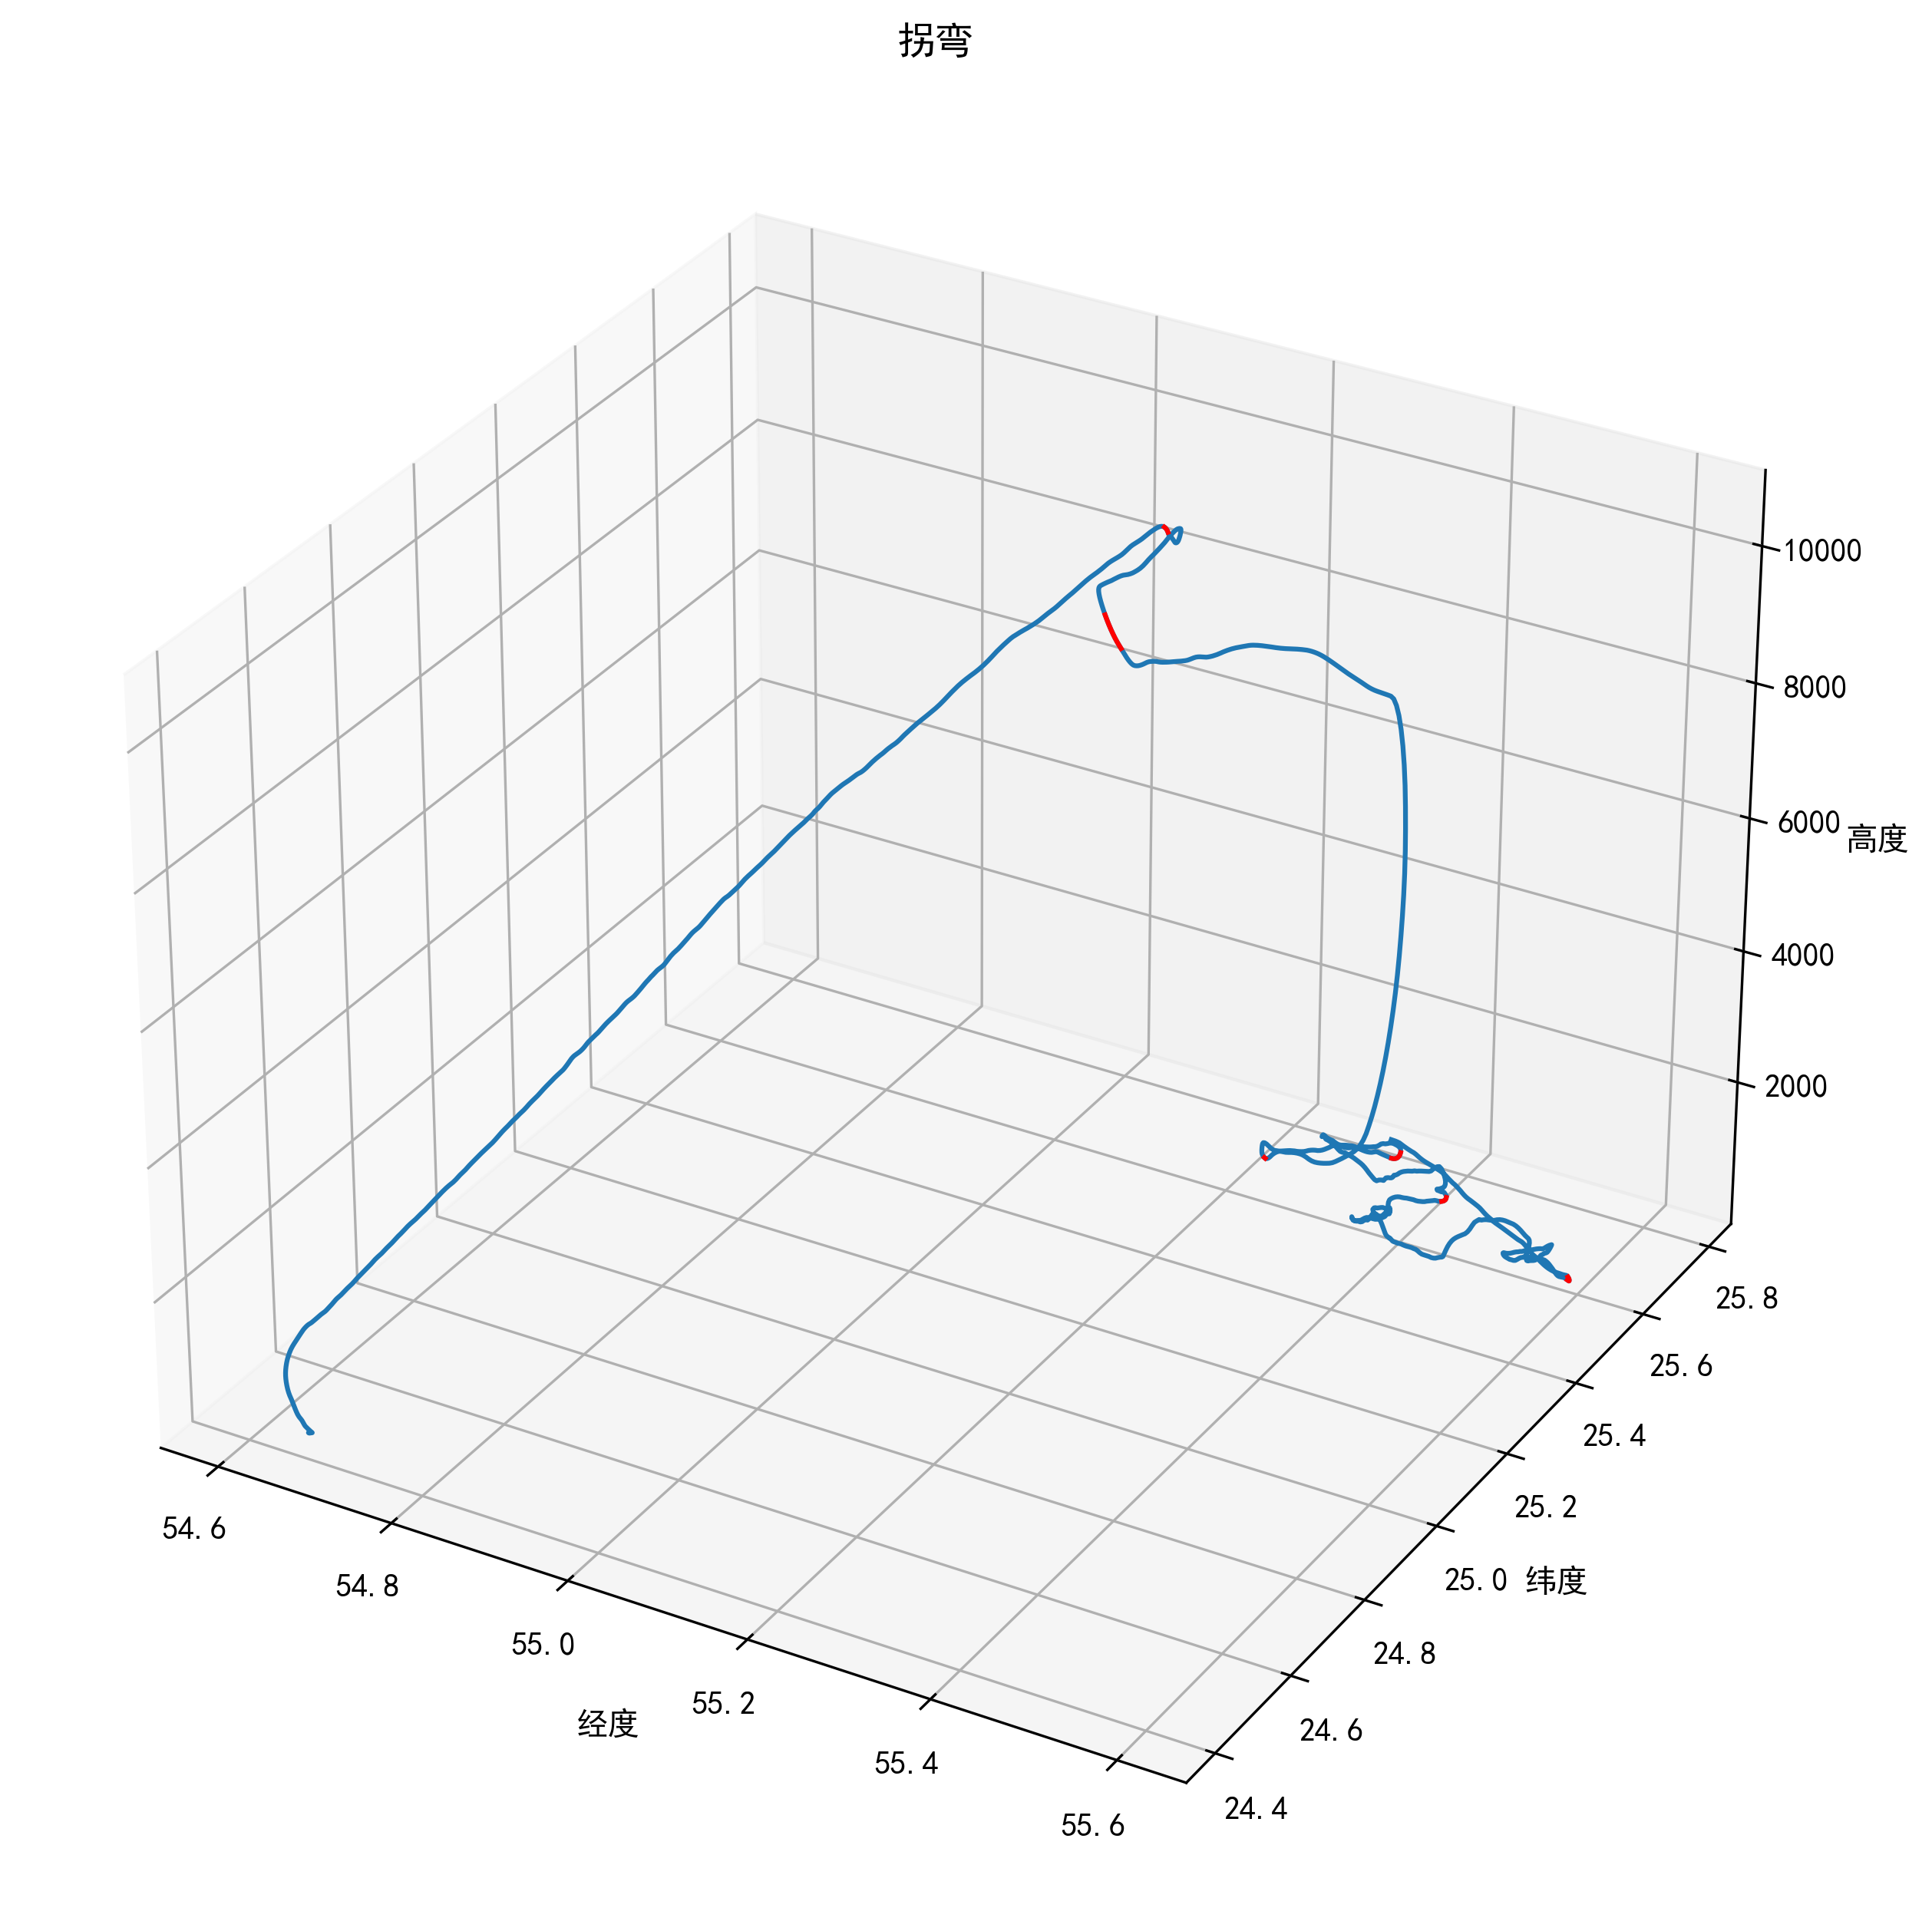

[[55.2095926, 55.2098905, 55.2100118, 55.2099604, 55.2097422],
 [55.1269199,
  55.1291496,
  55.1314049,
  55.1336225,
  55.1357918,
  55.1378675,
  55.1398426,
  55.1416749,
  55.143364],
 [55.2268201, 55.2267869],
 [55.3370235,
  55.3372378,
  55.3370583,
  55.3364695,
  55.3355567,
  55.3343746,
  55.3330046,
  55.3314851],
 [55.4144215, 55.4147557, 55.414781, 55.4144102, 55.4136891, 55.4126545],
 [55.5950743,
  55.5963197,
  55.5974317,
  55.5984063,
  55.5992214,
  55.5998909,
  55.6004057,
  55.6007475,
  55.6008394,
  55.6007384]]

In [5]:
# 获取经度、维度、高度
longitude = []
latitude = []
altitude = []
for i in range(len(data['Longitude'].to_list())):
    longitude.append(data['Longitude'].to_list()[i])
    latitude.append(data['Latitude'].to_list()[i])
    altitude.append(data['Altitude'].to_list()[i])


longitude1 = []
latitude1 = []
altitude1 = []
for i in range(len(flag)):
    temp_long = []
    temp_lat = []
    temp_alt = []
    for j in range(len(times_[flag[i]])):
        temp_long.append(data.loc[times_[flag[i]][j]]['Longitude'])
        temp_lat.append(data.loc[times_[flag[i]][j]]['Latitude'])
        temp_alt.append(data.loc[times_[flag[i]][j]]['Altitude'])
    longitude1.append(temp_long)
    latitude1.append(temp_lat)
    altitude1.append(temp_alt)




# 绘制三维轨迹图
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(longitude, latitude, altitude)
# 绘制在同一张图上一条红线
for i in range(len(longitude1)):
    ax.plot(longitude1[i], latitude1[i], altitude1[i], color='r')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_zlabel('高度')

# 设置DPI为300
fig.set_dpi(300)
# 设置图片大小
fig.set_size_inches(18.5, 10.5)
# 设置标题
plt.title('拐弯')
# 保存图片
plt.savefig('./fig/拐弯.png', dpi=300)
plt.show()
longitude1 

